# Import Packages

In [1]:
import xgi
import hypercontagion as hc
import matplotlib.pyplot as plt
import time
import numpy as np
import random

# Set Up the Hypergraph
* Specify the number of nodes
* Specify the hyperdegree distribution
* Generates a configuration model of the hypergraph

In [2]:
n = 1000
k1 = {i : random.randint(5, 10) for i in range(n)}
k2 = {i : sorted(k1.values())[i] for i in range(n)}
H = xgi.chung_lu_hypergraph(k1, k2)

# Epidemic Simulations

## Epidemic Parameters
* Initial size is the number of initial infected nodes
* $\gamma$ is the healing rate of a node
* $\mathbf{\beta}$ is the infection rate for each hyperedge size (keys are the hyperedge size and the value is the infection rate)

In [3]:
initial_size = 100
gamma = 0.05
tau = {i: 0.1 for i in xgi.unique_edge_sizes(H)}

## Run an SIR simulation on hypergraphs
* First simulation is is with discrete time steps (DTMC)
* Second simulation is the Gillespie algorithm (CTMC)

In [4]:
start = time.time()
t1, S1, I1, R1 = hc.discrete_SIR(H, tau, gamma, tmin=0, tmax=100, dt=1, rho=0.1)
print(time.time() - start)

start = time.time()
t2, S2, I2, R2 = hc.Gillespie_SIR(H, tau, gamma, tmin=0, tmax = 100, rho=0.1)
print(time.time() - start)

start = time.time()
t3, S3, I3, R3 = hc.event_driven_SIR(H, tau, gamma, tmin=0, tmax=100, dt=1, rho=0.1)
print(time.time() - start)

3.9190499782562256
0.497661828994751
1.667914628982544


### Plot the results

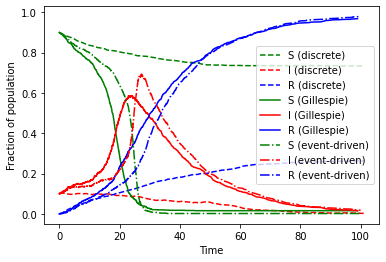

In [5]:
plt.figure()
plt.plot(t1, S1/n, 'g--', label="S (discrete)")
plt.plot(t1, I1/n, 'r--', label="I (discrete)")
plt.plot(t1, R1/n, 'b--', label="R (discrete)")
plt.plot(t2, S2/n, 'g-', label="S (Gillespie)")
plt.plot(t2, I2/n, 'r-', label="I (Gillespie)")
plt.plot(t2, R2/n, 'b-', label="R (Gillespie)")
plt.plot(t3, S3/n, 'g-.', label="S (event-driven)")
plt.plot(t3, I3/n, 'r-.', label="I (event-driven)")
plt.plot(t3, R3/n, 'b-.', label="R (event-driven)")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Fraction of population')
plt.show()

## Run an SIS simulation on hypergraphs
* First simulation is is with discrete time steps (DTMC)
* Second simulation is the Gillespie algorithm (CTMC)

In [ ]:
start = time.time()
t1, S1, I1 = hc.discrete_SIS(H, tau, gamma, tmin=0, tmax=50, dt=1, rho=0.5)
print(time.time() - start)

start = time.time()
t2, S2, I2 = hc.Gillespie_SIS(H, tau, gamma, tmin=0, tmax=50, rho=0.5)
print(time.time() - start)

start = time.time()
t3, S3, I3 = hc.event_driven_SIS(H, tau, gamma, tmin=0, tmax=50, rho=0.5)
print(time.time() - start)

### Plot the results

In [ ]:
plt.figure()
plt.plot(t1, S1/n, 'g--', label="S (discrete)")
plt.plot(t1, I1/n, 'r--', label="I (discrete)")
plt.plot(t2, S2/n, 'g-', label="S (Gillespie)")
plt.plot(t2, I2/n, 'r-', label="I (Gillespie)")
plt.plot(t3, S3/n, 'g-.', label="S (event-driven)")
plt.plot(t3, I3/n, 'r-.', label="I (event-driven)")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Fraction of population')
plt.show()